# COMPARISON OF SEATTLE AND BOSTON AIRBNB DATA

## PATTERN OF PRICES: AIRBNB BOSTON AND SEATTLE

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
class Airbnb_calendar:
    """ Airbnb class for calculating pattern of prices.
    """
    def __init__(self,date,price):
        self.price=price
        self.date=date
    
    def price_convert(self):
        '''
        Args: None
    
        Returns: dataframe with old data and new price column
        '''
    
        prices=[]
        for p in self.price:
            
            prices.append(float(p[1:].replace(',','')))
            
        self.price=prices 
    
        return self


    
    def separate_date(self):
        '''Function to separate date column into day month and year
        
        Args: None
        
        Returns: dataframe with new columns of Year, Month and Day
        
        '''
        newself= pd.DataFrame(self.__dict__)
        newself['Year'],newself['Month'],newself['Day']=newself['date'].str.split('-',2).str
        return newself

In [14]:
calendar1=pd.read_csv('calendar_seattle.csv')
calendar1=calendar1.dropna()

In [15]:
calendar_seattle=Airbnb_calendar(calendar1['date'],calendar1['price'])
calendar_seattle=calendar_seattle.price_convert()
calendar_seattle=calendar_seattle.separate_date()

In [5]:
calendar2=pd.read_csv('calendar_boston.csv')
calendar2=calendar2.dropna()
calendar_boston=Airbnb_calendar(calendar2['date'],calendar2['price'])
calendar_boston=calendar_boston.price_convert()
calendar_boston=calendar_boston.separate_date()

In [6]:
Month_group_Seattle=calendar_seattle.groupby(['Year','Month']).price.mean().reset_index().rename(columns={'price':
                                                                                                    'average_Price'})
Month_group_Seattle['year-Month']=Month_group_Seattle['Year'].map(str) + "-" + Month_group_Seattle['Month'].map(str)

Month_group_Boston=calendar_boston.groupby(['Year','Month']).price.mean().reset_index().rename(columns={'price':
                                                                                                    'average_Price'})
Month_group_Boston['year-Month']=Month_group_Boston['Year'].map(str) + "-" + Month_group_Boston['Month'].map(str)


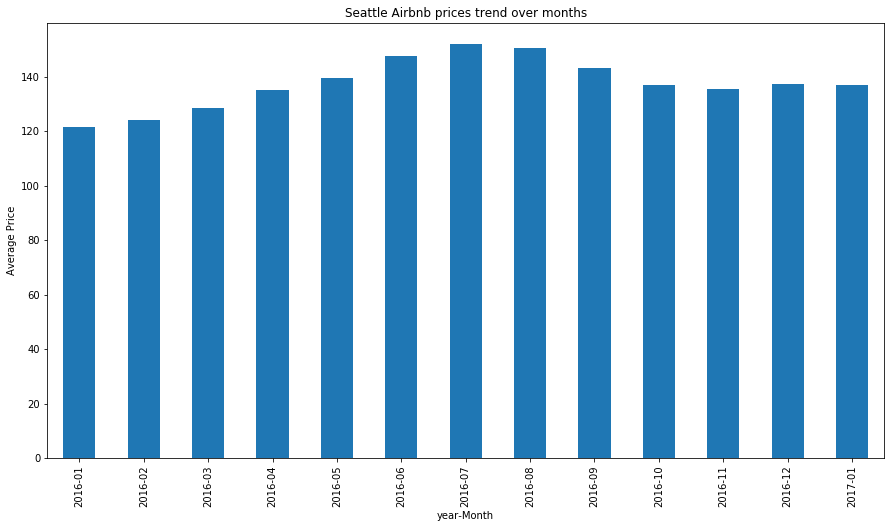

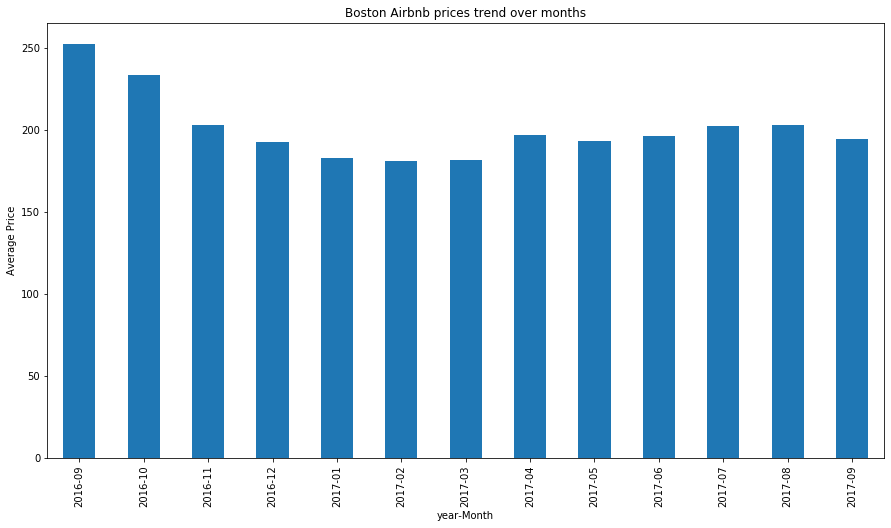

In [7]:
Month_group_Seattle.plot(kind='bar', 
           x='year-Month',
           y='average_Price',
           figsize =(15,8), 
           title = 'Seattle Airbnb prices trend over months', 
           legend = False)
plt.ylabel('Average Price')
plt.show()

Month_group_Boston.plot(kind='bar', 
           x='year-Month',
           y='average_Price',
           figsize =(15,8), 
           title = 'Boston Airbnb prices trend over months', 
           legend = False)
plt.ylabel('Average Price')
plt.show()

Seattle: The maximum average prices for listings were in the month of July, 2016 and August, 2016.

Boston: The maximum average prices for listings were in the month of September, 2016 and October, 2016.

### We can compare this results with holidays

In [6]:
from datetime import date
import datetime
import calendar
import holidays

In [7]:
us_holidays = holidays.UnitedStates()

def holidays_days(self):
    '''
    Args: dataframe calendar
    
    Returns: dataframe with day_Name, holiday and us_holidays_name columns 
                 
    '''
    
    self['day_Name']='default'
    self['holiday']='False'
    self['us_holidays_name']='working'
    for index,row in self.iterrows():
        sdate = datetime.date(int(row['Year']),int(row['Month']),int(row['Day']))
        vall=date(int(row['Year']),int(row['Month']),int(row['Day'])) in us_holidays
        self.at[index,'day_Name'] = calendar.day_name[sdate.weekday()]
        self.at[index,'holiday'] = vall
        self.at[index,'us_holidays_name'] = us_holidays.get(sdate)
    return self

In [16]:
def day_order(self):
    '''
    Args: dataframe calendar
    
    Returns: dataframe with average_Price per day
    
    '''    
    
    self['day_Name']='default'
    self['holiday']='False'
    self['us_holidays_name']='working'
    for index,row in calendar_seattle.iterrows():
        sdate = datetime.date(int(row['Year']),int(row['Month']),int(row['Day']))
        vall=date(int(row['Year']),int(row['Month']),int(row['Day'])) in us_holidays
        self.at[index,'day_Name'] = calendar.day_name[sdate.weekday()]
        self.at[index,'holiday'] = vall
        self.at[index,'us_holidays_name'] = us_holidays.get(sdate)
    self.head()
    
    print('a')
    
    day=self.groupby('day_Name').price.mean()
    day=self.reset_index()
    day['day_num']=0
    
    print('b')
    
    for index,row in day.iterrows():
        if row['day_Name']=='Monday':
            day.at[index,'day_num']=1
        if row['day_Name']=='Tuesday':
            day.at[index,'day_num']=2
        if row['day_Name']=='Wednesday':
            day.at[index,'day_num']=3
        if row['day_Name']=='Thursday':
            day.at[index,'day_num']=4
        if row['day_Name']=='Friday':
            day.at[index,'day_num']=5
        if row['day_Name']=='Saturday':
            day.at[index,'day_num']=6
        if row['day_Name']=='Sunday':
            day.at[index,'day_num']=7
    print('c')
    day=day.sort_values('day_num',ascending=[1])
    day=day.rename(columns={'price':'Average_Price'})
    
    return day

In [17]:
calendar_seattle=holidays_days(calendar_seattle)
day_seattle=day_order(calendar_seattle)

a
b
c


In [30]:
print(day_seattle.groupby(['us_holidays_name']).Average_Price.mean())

us_holidays_name
Christmas Day                 137.974903
Christmas Day (Observed)      137.895797
Columbus Day                  134.985660
Independence Day              151.402362
Labor Day                     142.087264
Martin Luther King Jr. Day    121.740475
Memorial Day                  143.233837
New Year's Day                138.126968
New Year's Day (Observed)     135.572767
Thanksgiving                  136.054989
Veterans Day                  140.070272
Washington's Birthday         125.353895
Name: Average_Price, dtype: float64


In [9]:
calendar_boston=holidays_days(calendar_boston)
print(calendar_boston.head())

     price        date  Year Month Day  day_Name holiday us_holidays_name
365   65.0  2017-08-22  2017    08  22   Tuesday   False             None
366   65.0  2017-08-21  2017    08  21    Monday   False             None
367   65.0  2017-08-20  2017    08  20    Sunday   False             None
368   75.0  2017-08-19  2017    08  19  Saturday   False             None
369   75.0  2017-08-18  2017    08  18    Friday   False             None


In [12]:
calendar_boston.groupby(['us_holidays_name']).price.mean().head()

us_holidays_name
Christmas Day               198.380805
Christmas Day (Observed)    196.901139
Columbus Day                237.838101
Independence Day            197.900737
Labor Day                   189.907829
Name: price, dtype: float64

In [37]:
import matplotlib.pyplot as plt
dayname = list()
for i in day_seattle['day_Name']:
    dayname.append(i)
avgprice = list()
for i in day_seattle['Average_Price']:
    avgprice.append(i)
graph_input = dict(zip(dayname,avgprice))


In [38]:
df=pd.DataFrame()
df['Day']=dayname
df['Average_price']=avgprice

In [39]:
df.groupby(['Day']).Average_price.mean().head(7)

Day
Friday       143.036294
Monday       135.676414
Saturday     143.202136
Sunday       136.459941
Thursday     136.476032
Tuesday      135.408764
Wednesday    135.447880
Name: Average_price, dtype: float64

## Listings

In [40]:
def cancellation(file):
    file=file[['review_scores_value','cancellation_policy','reviews_per_month']]
    file.dropna()

    return file.groupby(['cancellation_policy']).review_scores_value.mean().reset_index()
    

def review_scores(file):
    file=file[['review_scores_value','cancellation_policy','reviews_per_month']]
    file.dropna()
    
    return file.groupby(['review_scores_value']).reviews_per_month.mean().reset_index()

In [41]:
listings_boston=pd.read_csv('listings_boston.csv')
listings_boston['mean_diff'] = np.absolute(listings_boston['review_scores_value'] - 
                                           listings_boston['review_scores_value'].mean())

cancellation_boston=cancellation(listings_boston)
print('BOSTON')
print('Cancellation types:')
print(cancellation_boston.head())

review_scores_boston=review_scores(listings_boston)
print('Review scores:')
print(review_scores_boston.head())

BOSTON
Cancellation types:
  cancellation_policy  review_scores_value
0            flexible             9.237421
1            moderate             9.307398
2              strict             9.081441
3     super_strict_30             8.537313
Review scores:
   review_scores_value  reviews_per_month
0                  2.0           0.335714
1                  3.0           0.185000
2                  4.0           0.605833
3                  5.0           0.135000
4                  6.0           0.848776


In [42]:
listings_seattle=pd.read_csv('listings_seattle.csv')
listings_seattle['mean_diff'] = np.absolute(listings_seattle['review_scores_value'] - listings_seattle['review_scores_value'].mean())

cancellation_seattle=cancellation(listings_seattle)
print('Seattle')
print('Cancellation types:')
print(cancellation_seattle.head())

review_scores_seattle=review_scores(listings_seattle)
print('Review scores:')
print(review_scores_seattle.head())

Seattle
Cancellation types:
  cancellation_policy  review_scores_value
0            flexible             9.504516
1            moderate             9.497790
2              strict             9.378981
Review scores:
   review_scores_value  reviews_per_month
0                  2.0           1.000000
1                  4.0           0.755000
2                  5.0           0.230000
3                  6.0           0.567500
4                  7.0           0.866579
